# Graded lab: Implement DQN for LunarLander Use pythonproejct3 kernel

This lab is a modified verstion of a notebookfrom the Deep RL Course on HuggingFace.

In this notebook, you'll train your **Deep Q-Network (DQN) agent** to play an Atari game. Your agent controls a spaceship, the Lunar Lander, to learn how to **land correctly on the Moon**.

*All your answers should be written in this notebook. You shouldn’t need to write or modify any other files. The parts of code that need to be changed as labelled as TODOs in the comments. You should execute every block of code to not miss any dependency.*

### The environment

We will use the [LunarLander-v2](https://gymnasium.farama.org/environments/box2d/lunar_lander/) environment from Gymnasium. This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

In [1]:
%%html
<video controls autoplay><source src="https://huggingface.co/sb3/ppo-LunarLander-v2/resolve/main/replay.mp4" type="video/mp4"></video>

### Note on HuggingFace

You can easily find the HuggingFace original notebook which uses the [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/). This library provides a set of reliable implementations of reinforcement learning algorithms in PyTorch.

The Hugging Face Hub 🤗 works as a central place where anyone can share and explore models and datasets. It has versioning, metrics, visualizations and other features that will allow you to easily collaborate with others.

You can see here all the Deep reinforcement Learning models available here https://huggingface.co/models?pipeline_tag=reinforcement-learning&sort=downloads

## Install dependencies and create a virtual screen 🔽

The first step is to install the dependencies, we’ll install multiple ones.

- `gymnasium[box2d]`: Contains the LunarLander-v2 environment
- `stable-baselines3[extra]`: The deep reinforcement learning library.


In [3]:
!sudo apt install swig cmake

[sudo] Passwort für sam: 


In [6]:
!pip install gymnasium[box2d]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 9.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.8 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=495028 sha256=f7012274e4d0a9934ac3f01a7593f77cb7b81563a8e4496f3373f25a8b88c2ec
  Stored in directory: /home/sam/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [5]:
!pip install stable-baselines3==2.0.0a5

  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 10.7 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 10.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 10.8 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.2 MB/s eta 0:00:0000:0100:01
 

During the notebook, we'll need to generate a replay video. To do so, with colab, **we need to have a virtual screen to be able to render the environment** (and thus record the frames).

Hence the following cell will install virtual screen libraries and create and run a virtual screen

In [ ]:
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

[sudo] Passwort für sam: 
[sudo] Passwort für sam: 

To make sure the new installed libraries are used, **sometimes it's required to restart the notebook runtime**. The next cell will force the **runtime to crash, so you'll need to connect again and run the code starting from here**. Thanks to this trick, **we will be able to run our virtual screen.**

In [ ]:
#import os
#os.kill(os.getpid(), 9)

: 

In [2]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()


testing the virtual display (you have to rerun above code afterwards)

Virtual display started.
Test plot saved as 'test_output.png'.
Virtual display stopped.


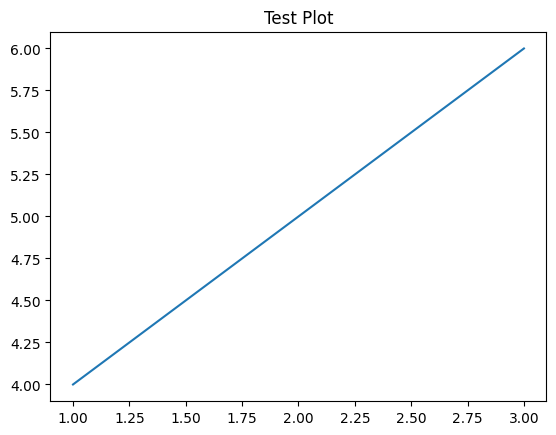

In [ ]:
#from pyvirtualdisplay import Display
#import matplotlib.pyplot as plt

# Start virtual display
#display = Display(visible=0, size=(800, 600))
#display.start()
#print("Virtual display started.")

# Create a plot
#plt.plot([1, 2, 3], [4, 5, 6])
#plt.title("Test Plot")
#plt.savefig("test_output.png")
#print("Test plot saved as 'test_output.png'.")

# Stop the display
#display.stop()
#print("Virtual display stopped.")

## Import the packages

In [1]:
import gymnasium as gym

from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor

## Create the LunarLander environment and understand how it works

### [The environment](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

The goal is to train our agent, a [Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/), **to land correctly on the moon**. To do that, the agent needs to learn **to adapt its speed and position (horizontal, vertical, and angular) to land correctly.**

In [3]:
# We create our environment with gym.make("<name_of_the_environment>")
env = gym.make("LunarLander-v2")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [ -3.0864604  -81.92551     -1.8537403    3.328168    -2.5453484
  -1.4697857    0.5455032    0.78551203]


We see with `Observation Space Shape (8,)` that the observation is a vector of size 8, where each value contains different information about the lander:
- Horizontal pad coordinate (x)
- Vertical pad coordinate (y)
- Horizontal speed (x)
- Vertical speed (y)
- Angle
- Angular speed
- If the left leg contact point has touched the land (boolean)
- If the right leg contact point has touched the land (boolean)


In [4]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 0


The action space (the set of possible actions the agent can take) is discrete with 4 actions available:

- Action 0: Do nothing,
- Action 1: Fire left orientation engine,
- Action 2: Fire the main engine,
- Action 3: Fire right orientation engine.

Reward function (the function that will gives a reward at each timestep):

After every step a reward is granted. The total reward of an episode is the **sum of the rewards for all the steps within that episode**.

For each step, the reward:

- Is increased/decreased the closer/further the lander is to the landing pad.
-  Is increased/decreased the slower/faster the lander is moving.
- Is decreased the more the lander is tilted (angle not horizontal).
- Is increased by 10 points for each leg that is in contact with the ground.
- Is decreased by 0.03 points each frame a side engine is firing.
- Is decreased by 0.3 points each frame the main engine is firing.

The episode receive an **additional reward of -100 or +100 points for crashing or landing safely respectively.**

An episode is **considered a solution if it scores at least 200 points.**

#### Vectorized Environment

- We create a vectorized environment (a method for stacking multiple independent environments into a single environment) of 16 environments, this way, **we'll have more diverse experiences during the training.**

In [74]:
# Create the environment
env = make_vec_env('LunarLander-v2', n_envs=16)

## Create the Model

Remember the goal: **being able to land the Lunar Lander to the Landing Pad correctly by controlling left, right and main orientation engine**. Based on this, s build the algorithm we're going to use to solve this Problem.

To solve this problem, you're going to implement DQN from scratch.

In [47]:
#### TODO: Define your DQN agent from scratch!
import gymnasium as gym
import numpy as np
import random
from collections import deque
import torch
import torch.nn as nn
import torch.optim as optim

defining the q network


In [48]:
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, hidden_size=64):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, action_size)

    def forward(self, state):
        x = self.relu1(self.fc1(state))
        x = self.relu2(self.fc2(x))
        return self.fc3(x)

In [49]:
class ReplayBuffer:
    def __init__(self, buffer_size):
        self.memory = deque(maxlen=buffer_size)

    def add(self, states, actions, rewards, next_states, dones):
        # Store experiences as a batch
        for i in range(len(dones)):
            experience = (states[i], actions[i], rewards[i], next_states[i], dones[i])
            self.memory.append(experience)

    def sample(self, batch_size):
        experiences = random.sample(self.memory, batch_size)
        return experiences

    def __len__(self):
        return len(self.memory)

defining the q agent

In [50]:
class DQNAgent:
    def __init__(
        self,
        state_size,
        action_size,
        buffer_size=100000,
        batch_size=64,
        gamma=0.99,
        lr=1e-3,
        tau=1e-3,
        update_every=4,
        device="cpu",
    ):
        self.state_size = state_size
        self.action_size = action_size
        self.device = torch.device(device)

        # Q-Network
        self.qnetwork_local = QNetwork(state_size, action_size).to(self.device)
        self.qnetwork_target = QNetwork(state_size, action_size).to(self.device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=lr)

        # Replay memory
        self.memory = ReplayBuffer(buffer_size)
        self.batch_size = batch_size

        # Hyperparameters
        self.gamma = gamma
        self.tau = tau
        self.update_every = update_every

        # Initialize time step for updating every update_every steps
        self.t_step = 0

    def step(self, states, actions, rewards, next_states, dones):
        # Store experiences in replay memory
        self.memory.add(states, actions, rewards, next_states, dones)

        # Learn every update_every time steps
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample(self.batch_size)
                self.learn(experiences)

    def act(self, states, eps=0.0):
        # states is a batch of states (n_envs x state_size)
        states = torch.from_numpy(states).float().to(self.device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(states)
        self.qnetwork_local.train()
        # Epsilon-greedy action selection
        action_values = action_values.cpu().data.numpy()
        batch_size = states.shape[0]
        best_actions = np.argmax(action_values, axis=1)
        random_actions = np.random.randint(self.action_size, size=batch_size)
        eps_mask = np.random.rand(batch_size) < eps
        actions = np.where(eps_mask, random_actions, best_actions)
        return actions

    def learn(self, experiences):
        states, actions, rewards, next_states, dones = zip(*experiences)

        # Convert to tensors
        states = torch.from_numpy(np.vstack(states)).float().to(self.device)
        actions = torch.from_numpy(np.vstack(actions)).long().to(self.device)
        rewards = torch.from_numpy(np.vstack(rewards)).float().to(self.device)
        next_states = torch.from_numpy(np.vstack(next_states)).float().to(self.device)
        dones = (
            torch.from_numpy(np.vstack(dones).astype(np.uint8)).float().to(self.device)
        )

        # Get max predicted Q values (for next states) from target model
        Q_targets_next = (
            self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        )
        # Compute Q targets for current states
        Q_targets = rewards + (self.gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Compute loss
        loss = nn.MSELoss()(Q_expected, Q_targets)

        # Minimize the loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Soft update target network parameters
        self.soft_update(self.qnetwork_local, self.qnetwork_target)

    def soft_update(self, local_model, target_model):
        # θ_target = τ*θ_local + (1 - τ)*θ_target
        for target_param, local_param in zip(
            target_model.parameters(), local_model.parameters()
        ):
            target_param.data.copy_(
                self.tau * local_param.data + (1.0 - self.tau) * target_param.data
            )

setting up the enviroment again

In [51]:

state_size = env.observation_space.shape[0]
action_size = env.action_space.n

agent = DQNAgent(
    state_size, action_size, device="cuda" if torch.cuda.is_available() else "cpu"
)

## Train the DQN agent
- Let's train our agent for 1,000,000 timesteps, don't forget to use GPU (on your local installation, Google Colab or similar). You will notice that experiments will take considerably longer than previous labs.

#### Solution

In [ ]:
import numpy as np
from collections import deque


def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    timestep_count = 0  # total number of timesteps

    # Initialize states and scores for each environment
    states = env.reset()
    n_envs = env.num_envs
    env_scores = np.zeros(n_envs)
    print(f"Number of environments: {n_envs}")

    for i_episode in range(1, n_episodes + 1):
        episode_scores = []

        for t in range(max_t):
            actions = agent.act(states, eps)
            next_states, rewards, dones, infos = env.step(actions)

            agent.step(states, actions, rewards, next_states, dones)

            env_scores += rewards
            timestep_count += n_envs/16
            #print(f"Episode {i_episode}, Timesteps: {timestep_count}")

            # Collect scores and reset env_scores for done environments
            for i, done in enumerate(dones):
                if done:
                    episode_scores.append(env_scores[i])
                    env_scores[i] = 0.0  # Reset the score for the environment

            states = next_states

            if timestep_count >= 1_000_000:
                print(f"Reached {timestep_count} timesteps. Training complete.")
                return scores

        # Update epsilon
        eps = max(eps_end, eps_decay * eps)

        # Record the scores
        if len(episode_scores) > 0:
            avg_score = np.mean(episode_scores)
            scores_window.append(avg_score)
            scores.append(avg_score)

            if i_episode % 10 == 0:
                print(
                    f"Episode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}"
                )

    return scores


scores = dqn()

Number of environments: 16
Episode 10	Average Score: -172.86
Episode 20	Average Score: -167.01
Episode 30	Average Score: -157.37
Episode 40	Average Score: -146.86
Episode 50	Average Score: -137.84
Episode 60	Average Score: -129.87
Episode 70	Average Score: -122.07
Episode 80	Average Score: -114.70
Episode 90	Average Score: -108.18
Episode 100	Average Score: -102.28
Episode 110	Average Score: -89.06
Episode 120	Average Score: -76.79
Episode 130	Average Score: -65.66
Episode 140	Average Score: -56.35
Episode 150	Average Score: -47.50
Episode 160	Average Score: -39.61
Episode 170	Average Score: -32.72
Episode 180	Average Score: -26.24


plotubg tge dqn learning scores

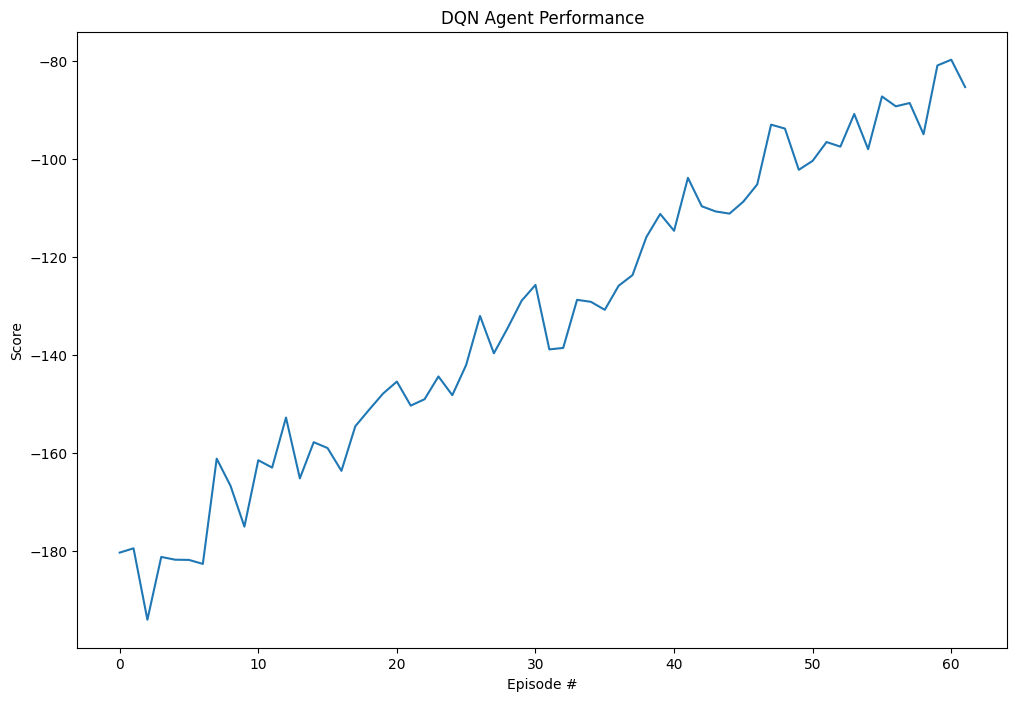

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(scores)), scores)
plt.xlabel("Episode #")
plt.ylabel("Score")
plt.title("DQN Agent Performance")
plt.show()

savinf the module

In [27]:
torch.save(agent.qnetwork_local.state_dict(), "dqn_lunarlander.pth")

## Evaluate the agent
- Now that our Lunar Lander agent is trained, we need to **check its performance**.

**Note**: When you evaluate your agent, you should not use your training environment but create an evaluation environment.

In [ ]:
# Create a new environment for evaluation
eval_env = gym.make("LunarLander-v2")

# Load the trained model
agent.qnetwork_local.load_state_dict(torch.load("dqn_lunarlander.pth"))


# Function to evaluate the trained agent
# dont run this in between above and optuna code since this will reset enviroment 
# def evaluate_agent(env, agent, n_episodes=10):
    total_rewards = []
    for episode in range(n_episodes):
        state, _ = env.reset()  # Extract the state from the reset output
        episode_reward = 0
        done = False
        while not done:
            # Convert state to tensor and pass it to the model
            state_tensor = torch.from_numpy(state).float().unsqueeze(0).to(agent.device)
            with torch.no_grad():
                action = np.argmax(
                    agent.qnetwork_local(state_tensor).cpu().data.numpy()
                )
            step_result = env.step(action)

            # Unpack step_result dynamically based on its length
            if len(step_result) == 4:
                next_state, reward, done, _ = step_result
            elif len(step_result) == 5:
                next_state, reward, done, _, _ = step_result

            episode_reward += reward
            state = next_state  # Update state for the next step
        total_rewards.append(episode_reward)
    return np.mean(total_rewards), np.std(total_rewards)


# Evaluate the model
mean_reward, std_reward = evaluate_agent(eval_env, agent)

# Print the results
print(f"Mean Reward: {mean_reward:.2f} +/- {std_reward:.2f}")

/tmp/ipykernel_4088547/4194578516.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  agent.qnetwork_local.load_state_dict(torch.load("dqn_lunarlander.pth"))


Mean Reward: 264.39 +/- 29.03


now we implement hyperparameter tuning using optuna

In [ ]:
import optuna
from optuna.trial import TrialState
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_parallel_coordinate,
    plot_slice,
)

def objective(trial):
    # Define the hyperparameters to be tuned
    buffer_size = trial.suggest_int("buffer_size", 10000, 1000000, log=True)
    batch_size = trial.suggest_int("batch_size", 32, 256, step=32)
    gamma = trial.suggest_float("gamma", 0.8, 0.999, step=0.01)
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-3)
    tau = trial.suggest_loguniform("tau", 1e-4, 1e-2)
    update_every = trial.suggest_int("update_every", 1, 20)

    # Initialize the agent with trial hyperparameters
    agent = DQNAgent(
        state_size=env.observation_space.shape[0],
        action_size=env.action_space.n,
        buffer_size=buffer_size,
        batch_size=batch_size,
        gamma=gamma,
        lr=lr,
        tau=tau,
        update_every=update_every,
        device="cuda" if torch.cuda.is_available() else "cpu",
    )

    def dqn_for_optuna(n_episodes=200, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
        scores_window = deque(maxlen=100)  # last 100 scores
        eps = eps_start  # initialize epsilon
        states = env.reset()
        n_envs = env.num_envs
        env_scores = np.zeros(n_envs)

        for i_episode in range(1, n_episodes + 1):
            episode_scores = []
            for t in range(max_t):
                actions = agent.act(states, eps)
                next_states, rewards, dones, infos = env.step(actions)

                agent.step(states, actions, rewards, next_states, dones)

                env_scores += rewards
                for i, done in enumerate(dones):
                    if done:
                        episode_scores.append(env_scores[i])
                        env_scores[i] = 0.0  # Reset the score for the environment

                states = next_states

            # Update epsilon
            eps = max(eps_end, eps_decay * eps)

            # Record scores
            if len(episode_scores) > 0:
                avg_score = np.mean(episode_scores)
                scores_window.append(avg_score)

            # Early stopping if average score is good enough
            if len(scores_window) == 100 and np.mean(scores_window) >= 200:
                break

        return np.mean(scores_window)

    # Run the DQN training with the current hyperparameters
    avg_score = dqn_for_optuna()

    # Optuna maximizes the objective, so we negate the score for minimization
    return -avg_score


# Create Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Save the study results for further analysis
study_df = study.trials_dataframe()
study_df.to_csv("optuna_dqn_results.csv", index=False)

[I 2024-12-03 21:38:09,596] A new study created in memory with name: no-name-3dfb2f72-14b8-4aa9-8be0-22376fd57824
/home/sam/anaconda3/envs/pythonProject3/lib/python3.10/site-packages/optuna/distributions.py:693: UserWarning: The distribution is specified by [0.8, 0.999] and step=0.01, but the range is not divisible by `step`. It will be replaced by [0.8, 0.99].
  warnings.warn(
/tmp/ipykernel_4088547/219144625.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-3)
/tmp/ipykernel_4088547/219144625.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  tau = trial.suggest_loguniform("tau", 1e-4, 1e-2)
[W 2024-12-03 21:41:09,835] 

KeyboardInterrupt: 

show optim history

optuna.visualization.plot_optimization_history(study)


In [ ]:
optuna.visualization.plot_param_importances(study)

save best model

In [ ]:
# Retrain the agent with the best hyperparameters
best_agent = DQNAgent(
    state_size=state_size,
    action_size=action_size,
    hidden_size=trial.params["hidden_size"],
    batch_size=trial.params["batch_size"],
    gamma=trial.params["gamma"],
    lr=trial.params["lr"],
    tau=trial.params["tau"],
    update_every=trial.params["update_every"],
    device="cuda" if torch.cuda.is_available() else "cpu",
)

# Train for more episodes if desired
best_scores = train_agent(
    best_agent,
    trial=None,
    n_episodes=500,
    eps_decay=trial.params["eps_decay"],
    eps_end=0.01,
)

# Save the model
torch.save(best_agent.qnetwork_local.state_dict(), "dqn_lunarlander_best.pth")

more plots (experimental couldnt run this till now since i havent done a full optuna study)

In [ ]:
# Optimization History
fig = plot_optimization_history(study)
fig.show()

# Hyperparameter Importance
fig = plot_param_importances(study)
fig.show()

# Parallel Coordinate Plot
fig = plot_parallel_coordinate(study)
fig.show()

# Slice Plot
fig = plot_slice(study)
fig.show()

# Save the study results for further analysis
study_df = study.trials_dataframe()
study_df.to_csv("optuna_dqn_results.csv", index=False)

# Save the best model path
best_model_path = "best_model.pth"
if os.path.exists(best_model_path):
    print(f"Loading best model from {best_model_path}")
    best_agent = DQNAgent(
        state_size=env.observation_space.shape[0],
        action_size=env.action_space.n,
        buffer_size=study.best_params["buffer_size"],
        batch_size=study.best_params["batch_size"],
        gamma=study.best_params["gamma"],
        lr=study.best_params["lr"],
        tau=study.best_params["tau"],
        update_every=study.best_params["update_every"],
        device="cuda" if torch.cuda.is_available() else "cpu",
    )
    best_agent.qnetwork_local.load_state_dict(torch.load(best_model_path))

# Print study insights
print("\nTop 5 Trials:")
top_trials = sorted(study.trials, key=lambda t: t.value)[:5]
for trial in top_trials:
    print(f"Trial {trial.number}: Value={-trial.value}, Params={trial.params}")